In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm


In [12]:
card = pd.read_csv('loan_approval_dataset.csv')
card

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
card['education'] = le.fit_transform(card['education'])
card['self_employed'] = le.fit_transform(card['self_employed'])
card['loan_status'] = le.fit_transform(card['loan_status'])
card

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [14]:
X = card.loc[:,~card.columns.isin (['loan_status','loan_id'])]
y = card['loan_status']
y


0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),index=X.index, columns=X.columns)




,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,-0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,-0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,-0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172
...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,-0.995559,0.992765,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213
4265,-1.473548,1.004461,0.992765,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732
4266,-0.294102,1.004461,-1.007288,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907
4267,-0.883825,1.004461,-1.007288,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341


In [16]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)


In [17]:
modelo = svm.SVC()
modelo.fit(X=Xtrain,y=ytrain)
modelo.score(Xtest,ytest)

0.9352068696330992

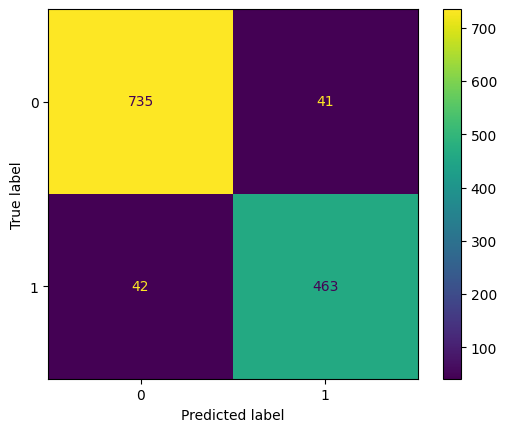

In [18]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ytest,modelo.predict(Xtest))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0','1'])
cm_display.plot()
plt.show() 

In [19]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Continuous
param_grid = {  
    'C': Continuous(0.01, 100),
    'gamma': Continuous(0.0001, 1),
    'kernel': Categorical(['rbf', 'linear', 'sigmoid','poly'])
}

evolved_estimator = GASearchCV(modelo,
                    cv=3,
                    scoring='accuracy',
                    param_grid=param_grid,
                    population_size=10,
                    generations=10,
                    tournament_size=3,
                    elitism=True,
                    mutation_probability=0.2,
                    verbose=True)

c:\Users\emanu\my-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
evolved_estimator.fit(Xtrain,ytrain)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	0.86593	0.0759536  	0.924699   	0.726573   
1  	7     	0.920248	0.00436372 	0.924699   	0.912316   
2  	6     	0.923762	0.00143402 	0.924699   	0.921352   
3  	10    	0.925167	0.00140562 	0.929384   	0.924699   
4  	8     	0.926104	0.00214712 	0.929384   	0.924699   
5  	8     	0.927041	0.0023427  	0.929384   	0.924699   
6  	8     	0.929819	0.00318923 	0.93842    	0.924699   
7  	4     	0.930288	0.00271084 	0.93842    	0.929384   
8  	5     	0.931827	0.00508889 	0.944779   	0.929384   
9  	9     	0.934538	0.00545875 	0.944779   	0.929384   
10 	4     	0.936345	0.00492275 	0.944779   	0.929384   


GASearchCV(estimator=SVC(C=np.float64(56.73800383423767),
                         gamma=np.float64(0.05442636111381132)),
           generations=10, mutation_probability=0.2,
           param_grid={'C': <sklearn_genetic.space.space.Continuous object at 0x0000014F70438790>,
                       'gamma': <sklearn_genetic.space.space.Continuous object at 0x0000014F7D51E650>,
                       'kernel': <sklearn_genetic.space.space.Categorical object at 0x0000014F70369850>},
           population_size=10, return_train_score=True, scoring='accuracy',
           warm_start_configs=[])

In [21]:

evolved_estimator.score(Xtest,ytest)


0.9430132708821234

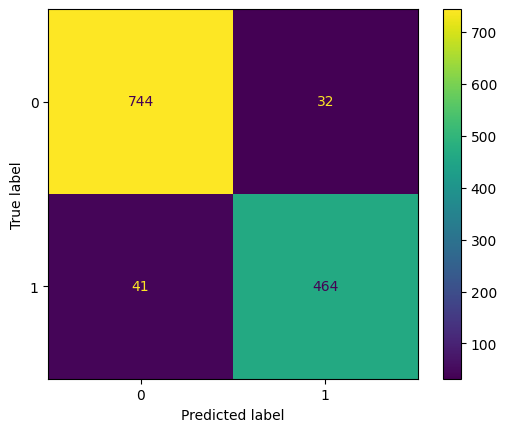

In [22]:
confusion_matrix = metrics.confusion_matrix(ytest,evolved_estimator.predict(Xtest))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0','1'])
cm_display.plot()
plt.show() 

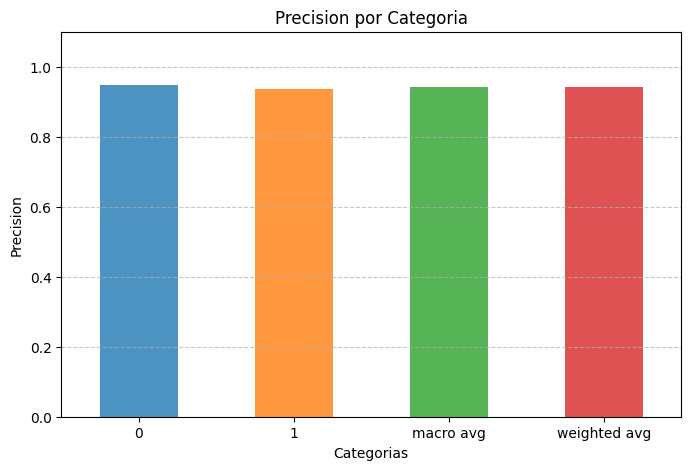

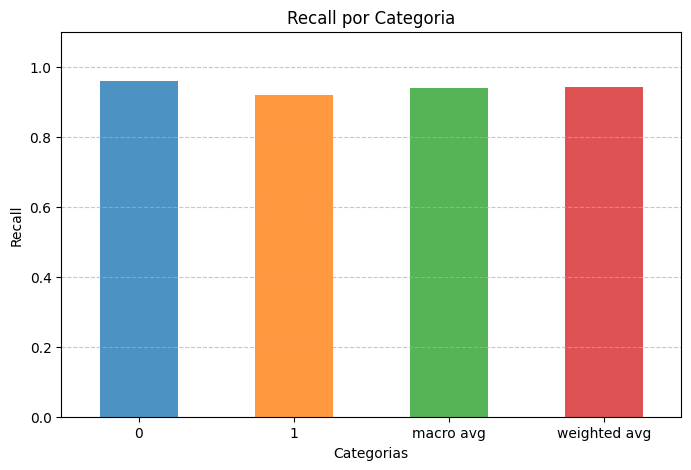

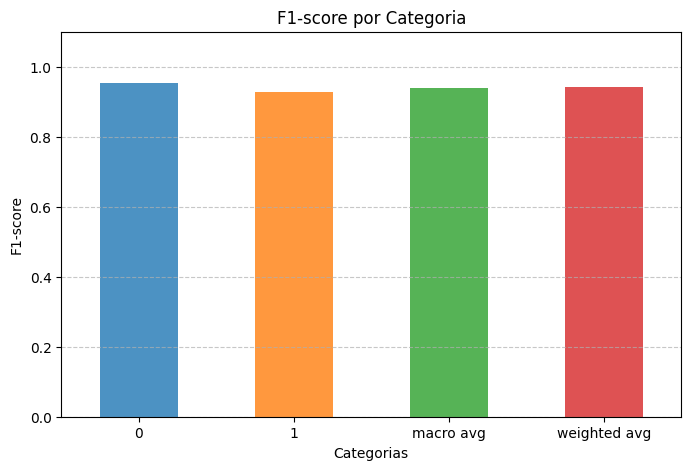

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       776
           1       0.94      0.92      0.93       505

    accuracy                           0.94      1281
   macro avg       0.94      0.94      0.94      1281
weighted avg       0.94      0.94      0.94      1281



In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

# Calcula o relatório de classificação
report = metrics.classification_report(
    ytest, 
    evolved_estimator.predict(Xtest), 
    target_names=['0', '1'], 
    output_dict=True
)

# Converte o relatório para DataFrame
df_report = pd.DataFrame(report).transpose()

# Seleciona apenas as métricas desejadas
metrics_to_plot = ['precision', 'recall', 'f1-score']
categories = ['0', '1', 'macro avg', 'weighted avg']

# Cria um gráfico de barras para cada métrica
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    df_report.loc[categories, metric].plot(
        kind='bar',
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
        alpha=0.8
    )
    plt.title(f'{metric.capitalize()} por Categoria')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Categorias')
    plt.ylim(0, 1.1)  # Ajusta o eixo Y para métricas normalizadas
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)  # Mantém os rótulos na horizontal
    plt.show()

# Imprime a tabela completa com as métricas para referência
print("Relatório de classificação:\n", metrics.classification_report(
    ytest, 
    evolved_estimator.predict(Xtest), 
    target_names=['0', '1']
))


In [33]:
# Acurácia
accuracy = metrics.accuracy_score(ytest, modelo.predict(Xtest))

# Erro Médio Quadrático (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(ytest, modelo.predict(Xtest)))

# Precisão (Precision)
precision = metrics.precision_score(ytest, modelo.predict(Xtest))

# Recall
recall = metrics.recall_score(ytest, modelo.predict(Xtest))

# F1-Score
f1_score = metrics.f1_score(ytest, modelo.predict(Xtest))



accuracy


0.9430132708821234

In [34]:
precision

0.9354838709677419

In [35]:
recall

0.9188118811881189

In [36]:
f1_score

0.9270729270729271

In [37]:
rmse

np.float64(0.2387189333041614)

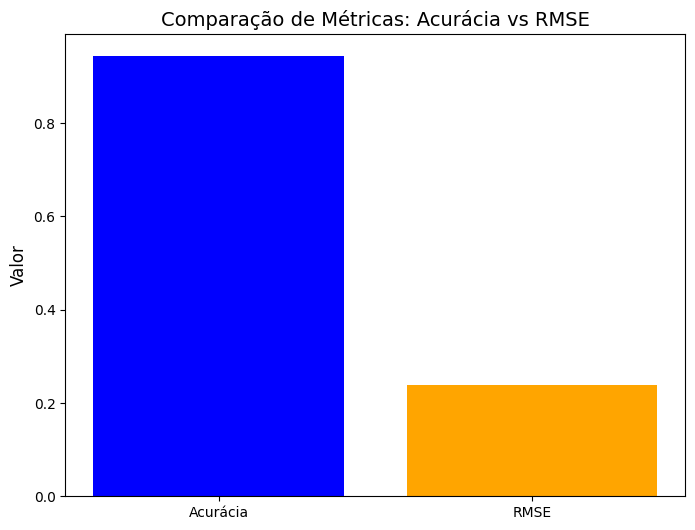

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Dados para o gráfico
metricas = ['Acurácia', 'RMSE']
valores = [accuracy, rmse]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(metricas, valores, color=['blue', 'orange'])

# Adicionando título e rótulos
plt.title('Comparação de Métricas: Acurácia vs RMSE', fontsize=14)
plt.ylabel('Valor', fontsize=12)

# Exibindo o gráfico
plt.show()
